# Partie I : Données de prêt de Prosper

**Présenté par Aby DIOUF**

Cet ensemble de données contient 113 937 prêts avec 81 variables sur chaque prêt, y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres.

Nous ne sommes pas censé explorer toutes les variables de l'ensemble de données ! 
Nous allons concentrer notre explorartion sur le dataset **prosper_data_clean.csv**  qui contient 83520 lignes et 15 variables sur chaque prêt.

In [1]:
# Importation des modules
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pour ignorer les warnings
import warnings
warnings.simplefilter("ignore")

## Vue d'ensemble du jeu de données

Avant de nous lancer directement dans l'exploration, prenons un moment pour avoir une vue d'ensemble de haut niveau de l'ensemble de données. Nous pourrons nous référer à ces points si nous avons besoin de nous orienter sur ce que nous devons attendre de chaque variable.

In [2]:
# load dataset
df_prosper = pd.read_csv('prosper_data_clean.csv')

In [3]:
# Nombre de lignes et de colonnes
df_prosper.shape

(83520, 15)

In [4]:
# Entête du dataset
df_prosper.head(10)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,Investors,ProsperScore,LoanStatus,BorrowerState,EmploymentStatus,ProsperRating (Alpha),Occupation,LoanOriginationDate,LoanNumber,LoanOriginalAmount
0,1209647,36,0.12016,0.0920,0.0820,1,7.0,Current,CO,Employed,A,Professional,2014-03-03 00:00:00,134815,10000
1,658116,36,0.12528,0.0974,0.0874,158,9.0,Current,GA,Employed,A,Skilled Labor,2012-11-01 00:00:00,77296,10000
2,909464,36,0.24614,0.2085,0.1985,20,4.0,Current,MN,Employed,D,Executive,2013-09-20 00:00:00,102670,15000
3,1074836,60,0.15425,0.1314,0.1214,1,10.0,Current,NM,Employed,B,Professional,2013-12-24 00:00:00,123257,15000
4,750899,36,0.31032,0.2712,0.2612,1,2.0,Current,KS,Employed,E,Sales - Retail,2013-04-18 00:00:00,88353,3000
5,768193,36,0.23939,0.2019,0.1919,1,4.0,Current,CA,Employed,C,Laborer,2013-05-13 00:00:00,90051,10000
6,1023355,36,0.07620,0.0629,0.0529,1,9.0,Current,IL,Employed,AA,Food Service,2013-12-12 00:00:00,121268,10000
7,1023355,36,0.07620,0.0629,0.0529,1,11.0,Current,IL,Employed,AA,Food Service,2013-12-12 00:00:00,121268,10000
8,587746,60,0.27462,0.2489,0.2389,19,7.0,Current,MD,Employed,C,Fireman,2012-05-17 00:00:00,65946,13500
9,1081604,36,0.17969,0.1435,0.1335,1,4.0,Past Due (1-15 days),AL,Employed,B,Sales - Retail,2014-01-07 00:00:00,125045,4000


In [6]:
#Typages des données
df_prosper.dtypes

ListingNumber              int64
Term                       int64
BorrowerAPR              float64
BorrowerRate             float64
LenderYield              float64
Investors                  int64
ProsperScore             float64
LoanStatus                object
BorrowerState             object
EmploymentStatus          object
ProsperRating (Alpha)     object
Occupation                object
LoanOriginationDate       object
LoanNumber                 int64
LoanOriginalAmount         int64
dtype: object

In [7]:
# information sur les données
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83520 entries, 0 to 83519
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingNumber          83520 non-null  int64  
 1   Term                   83520 non-null  int64  
 2   BorrowerAPR            83520 non-null  float64
 3   BorrowerRate           83520 non-null  float64
 4   LenderYield            83520 non-null  float64
 5   Investors              83520 non-null  int64  
 6   ProsperScore           83520 non-null  float64
 7   LoanStatus             83520 non-null  object 
 8   BorrowerState          83520 non-null  object 
 9   EmploymentStatus       83520 non-null  object 
 10  ProsperRating (Alpha)  83520 non-null  object 
 11  Occupation             83520 non-null  object 
 12  LoanOriginationDate    83520 non-null  object 
 13  LoanNumber             83520 non-null  int64  
 14  LoanOriginalAmount     83520 non-null  int64  
dtypes:

>  Ici vous constater que :
   - Les variables comme **LoanStatus, BorrowerState, EmploymentStatus, ProsperRating (Alpha) et Occupation** sont de type object et devrait etre de type category
   - Les variables comme **LoanOriginationDate  est de type object et devrait etre de type datetime 

**Object => Category**

In [8]:
# Covertir le type object en type category
df_prosper[['LoanStatus','BorrowerState','EmploymentStatus',
            'ProsperRating (Alpha)','Occupation']] = df_prosper[['LoanStatus','BorrowerState','EmploymentStatus',
            'ProsperRating (Alpha)','Occupation']].astype('category')

**Object => Datetime**

In [9]:
# Convertir le type object en datetime
df_prosper[['LoanOriginationDate']] = df_prosper[['LoanOriginationDate']].apply(pd.to_datetime)

In [10]:
# teste pour les modifications effectuées avec la fonction infos de pandas.
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83520 entries, 0 to 83519
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          83520 non-null  int64         
 1   Term                   83520 non-null  int64         
 2   BorrowerAPR            83520 non-null  float64       
 3   BorrowerRate           83520 non-null  float64       
 4   LenderYield            83520 non-null  float64       
 5   Investors              83520 non-null  int64         
 6   ProsperScore           83520 non-null  float64       
 7   LoanStatus             83520 non-null  category      
 8   BorrowerState          83520 non-null  category      
 9   EmploymentStatus       83520 non-null  category      
 10  ProsperRating (Alpha)  83520 non-null  category      
 11  Occupation             83520 non-null  category      
 12  LoanOriginationDate    83520 non-null  datetime64[ns]
 13  L

> Ici vous voyez que les variables modifiées les uns de types **category** , les autres de types **datetime** comme bien formuler .

In [11]:
df_prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,Investors,ProsperScore,LoanNumber,LoanOriginalAmount
count,8.352000e+04,83520.00000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000
mean,7.692475e+05,42.51523,0.226863,0.196257,0.186253,68.955759,5.964966,86051.288841,9103.743427
std,2.350255e+05,11.66907,0.080115,0.074807,0.074807,95.511709,2.375933,28766.108327,6300.856735
min,4.162750e+05,12.00000,0.045830,0.040000,0.030000,1.000000,1.000000,38045.000000,1000.000000
25%,5.565650e+05,36.00000,0.163280,0.135900,0.125900,1.000000,4.000000,60612.750000,4000.000000
50%,7.317860e+05,36.00000,0.219450,0.187500,0.177500,33.000000,6.000000,87119.500000,7500.000000
75%,9.715862e+05,60.00000,0.292540,0.257400,0.247400,98.000000,8.000000,108396.250000,14000.000000
max,1.255725e+06,60.00000,0.423950,0.360000,0.340000,1189.000000,11.000000,136486.000000,35000.000000


In [12]:
df_prosper.columns

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'Investors', 'ProsperScore', 'LoanStatus', 'BorrowerState',
       'EmploymentStatus', 'ProsperRating (Alpha)', 'Occupation',
       'LoanOriginationDate', 'LoanNumber', 'LoanOriginalAmount'],
      dtype='object')

### Quels est la structure de l'ensemble des données étudier?

L'ensemble de données que nous allons analyser comprend 83520 prêt  avec 15 caractéristiques  La plupart des variables sont de nature numérique, mais il contient aussi des variables de type categoriel.

### Quelle(s) est (sont) la (les) principale(s) variable (s) d'intérêt dans notre ensemble de données ?

Je suis surtout intéressé par la détermination des variables qui sont les meilleures pour predire le nombre moyen de prêt effectuées dans l'ensemble de données.
 

### Quelles sont les variables de l'ensemble de données qui, selon vous, vous aideront à mener vos recherches sur la ou les variables qui vous intéressent ?


Les variables comme le montant du prêt(**LoanOriginalAmount**), le numero du prêt(**LoanNumber**), le statut de l'emploi de l'emprunteur(**EmploymentStatus**),la profession de l'emprunteur (**Occupation**), le statut du prêt (**LoanStatus**) auront  un effet trés importants sur les données de prét de Prosper. Je pense également que les autres variables auront des effets sur les prêts, mais dans une mesure bien moindre que celle cité un peu en haut.


# Explorartion univarié

 ### Je vais commencer par examiner la distribution de la variable montant  : LoanOriginalAmount.

In [15]:

df_prosper['LoanOriginalAmount'].describe()

count    83520.000000
mean      9103.743427
std       6300.856735
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      14000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

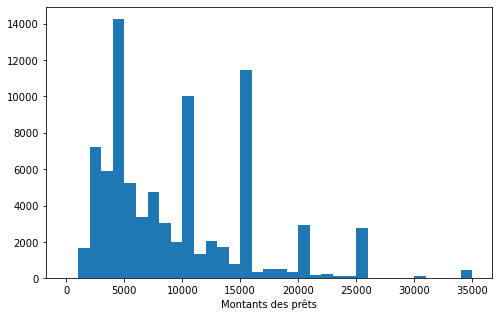

In [30]:
# Graphique à echelle standart avec hist() ou histogramme; J'utilise la fonction hist() de matplotlib
binsize = 1000
bins = np.arange(0,df_prosper['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data= df_prosper, x = 'LoanOriginalAmount', bins = bins )
plt.xlabel('Montants des prêts')
plt.show()

> Vous allez constater qu'il y'a une longue queue dans la distributions, alors mettons le **bins** sur une echelle logaritmique

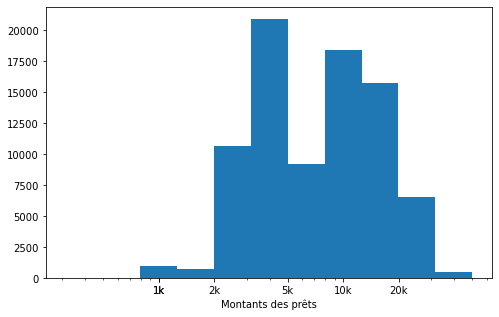

In [35]:
# Echelle logarithmique

log_binsize = 0.2
bins =10 ** np.arange(2.5,np.log10(df_prosper['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8,5])
plt.hist(data= df_prosper, x = 'LoanOriginalAmount', bins = bins )
plt.xscale('log')
plt.xticks([1000, 1e3, 2e3, 5e3, 1e4, 2e4], [1000,'1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Montants des prêts')
plt.show()

> Il faut noter que le montant est une distribution à longue queue.Losque le montant est représenter avec une echelle logarithmique, on constate que la distributions du montant est un peu bimodale, avec un pic entre 3000 et 5000 et un second pic en 10000. 

In [ ]:
# Diagramme en bar de la distribution de la variable ocupations
base_color =sns.color_palette()[0]
type_order = df_prosper['Occupation'].value_counts().index
plt.figure(figsize=[14,8])
# j'utilise la fonctio countplot de seaborn
sns.countplot(data = df_prosper, x ='Occupation',color =base_color, order = type_order)
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()

### Je vais examiner la distribution de la variable profession de l'emprunteur : Occupation

In [37]:
df_prosper['Occupation'].unique()

['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail', 'Laborer', ..., 'Student - College Junior', 'Tradesman - Plumber', 'Student - College Sophomore', 'Student - Community College', 'Student - Technical School']
Length: 67
Categories (67, object): ['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect', ..., 'Tradesman - Mechanic', 'Tradesman - Plumber', 'Truck Driver', 'Waiter/Waitress']

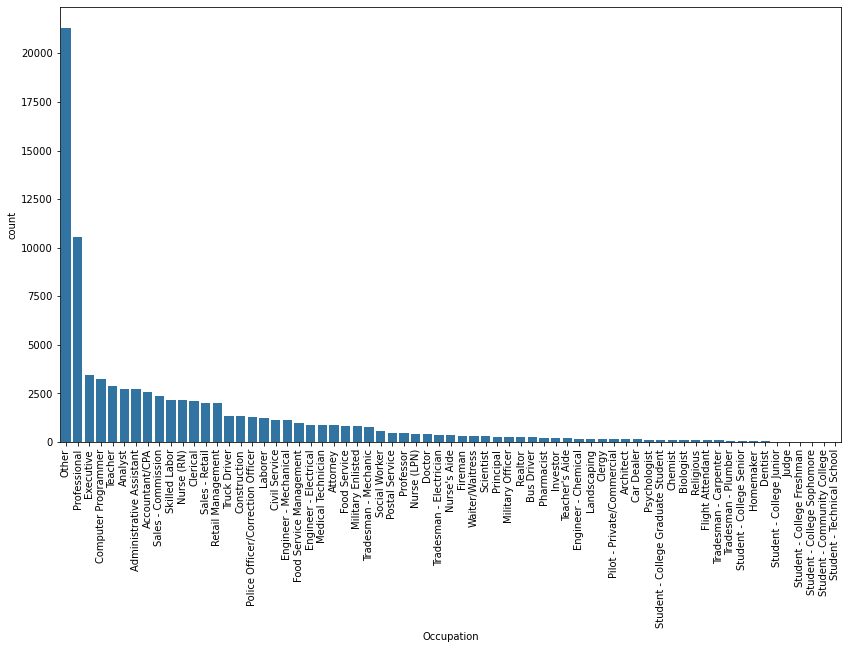

In [47]:
# Diagramme en bar de la distribution de la variable ocupations
base_color =sns.color_palette()[0]
type_order = df_prosper['Occupation'].value_counts().index
plt.figure(figsize=[14,8])
# j'utilise la fonctio countplot de seaborn
sns.countplot(data = df_prosper, x ='Occupation',color =base_color, order = type_order)
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()

> La plupart des emprunteurs sont des professionnels, des directeur (executive), des programmeur informatique, des teachers et des analyste.Mais aussi les emprunteurs dont leur occupation est Other occupe le nombre maximun d'emprunteurs.

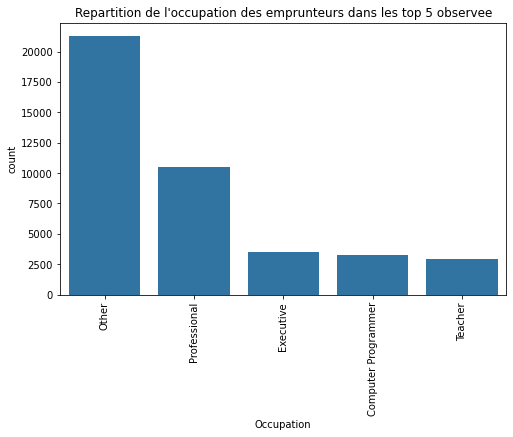

In [301]:
# Observation dans les top 5 
plt.figure(figsize=[8,5])
sns.countplot(data = df_prosper, x = 'Occupation', 
              color = base_color, order = df_prosper['Occupation'].value_counts().nlargest(5).index)
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.title("Repartition de l'occupation des emprunteurs dans les top 5 observee", );
plt.show()

Les tops 5 des professions des emprunteurs dans les données de prêt de Prosper sont les suivantes : **Other, professional, Executive, Computer Programmer, et Teacher**

### Observation du status de l'emprunteur : EmploymentStatus

In [80]:
df_prosper['EmploymentStatus'].value_counts()

Employed         67310
Full-time         7926
Self-employed     4538
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

(-1.1053817095796228,
 1.102589498236693,
 -1.1040956364374412,
 1.1038755713788746)

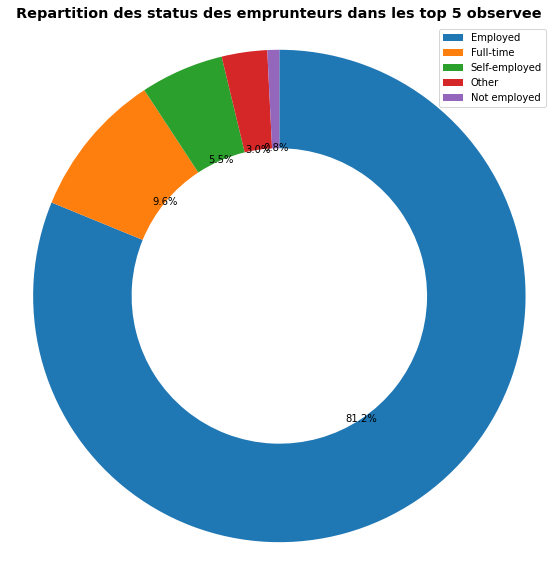

In [79]:
# Diagramme en anneau 
status_counts = df_prosper['EmploymentStatus'].value_counts().nlargest(5)
plt.figure(figsize = [30,10])
plt.pie(status_counts,startangle = 90, counterclock = False,wedgeprops = {'width' : 0.4},autopct="%1.1f%%")
plt.legend(status_counts.index)
plt.title("Repartition des status des emprunteurs dans les top 5 observee", 
          fontweight = "bold", fontsize = 'x-large');
plt.axis('square')

Voici le top 5 du statut des emprunteurs dans l'ensembles données de prêt de Prosper;**Employed** (employé) occupes 
$81.2$%, **Full-time** $9.6$%, **Self-employed**  $5.5$% **Other** $3.0$%, **Not employed** $0.8$%.
 

### Observation du status du prêt : LoanStatus

In [135]:
df_prosper['LoanStatus'].value_counts()

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [92]:
def percentage_blocks(df, var): 
    pourcentage = 100*df[var].value_counts()/ df.shape[0]
    counts = np.floor(pourcentage).astype(int)
# partie entier = cota minimum   
    decimal = (pourcentage - counts).sort_values(ascending = False)
    rem = 100 - counts.sum() 
    for cat in decimal.index[:rem]: 
        counts[cat] += 1
    return counts
    

(-0.8900000000000001, 9.89, 0.0, 10.780000000000001)

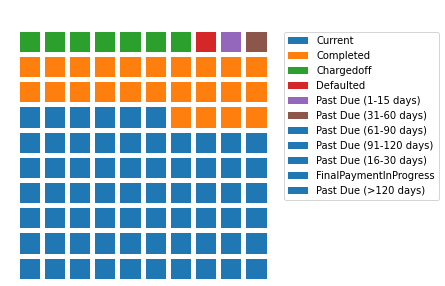

In [142]:
# Traçage diagramme en gaufre
waffle_counts = percentage_blocks(df_prosper, 'LoanStatus')
prev_count = 0
#Pour chaque categorie 
plt.figure(figsize= [8,5])
for cat in range(waffle_counts.shape[0]):
# obtenir les indices de bloc
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
# et mettez un bloc à l'emplacement de chaque indice
# utiliser l'opération mod pour obtenir le chiffre des unités 
    x = blocks % 10
# utiliser la division par le plancher pour obtenir le chiffre des dizaines
    y = blocks // 10 
    plt.bar(x, 0.8, 0.8,y)
    prev_count += waffle_counts[cat]

plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.6), loc = 6) 
plt.axis('off')
plt.axis('square')

> Vous voyez la plupart des prêts sont en cours **(Currents)** et occupe plus de $60$%. les prêts en phase compléte **(Completed** sont environ $23.5$%


### Je vais examiner la distribution des variables taux d'intérêt de l'emprunteur pour ce prêt: BorrowerRate, La durée du prêt exprimée en mois: Term, Le taux annuel effectif global (TAEG) de l'emprunteur pour le prêt: BorrowerAPR, le rendement du prêteur sur le prết: LenderYield


In [193]:
df_prosper[['BorrowerRate','BorrowerAPR']].value_counts()

BorrowerRate  BorrowerAPR
0.3177        0.35797        3672
0.3199        0.35643        1644
0.2699        0.30532         902
0.2599        0.29510         747
0.3134        0.35356         694
                             ... 
0.1311        0.15256           1
0.2360        0.27068           1
0.1315        0.15296           1
0.2357        0.26116           1
0.3600        0.42395           1
Length: 2410, dtype: int64

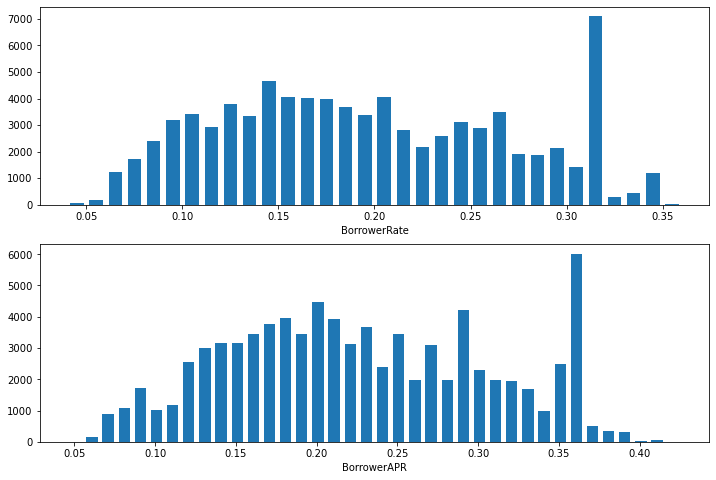

In [180]:
fig, ax = plt.subplots(nrows = 2, figsize=[12,8])

variables = ['BorrowerRate','BorrowerAPR']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_prosper[var]),max(df_prosper[var])+0.01,0.01)
    ax[i].hist(data = df_prosper, x=var, bins = bins,rwidth = 0.7)
    ax[i].set_xlabel('{}'.format(var))


> La  distribution des deux variables taux annuel effectif global (TAEG) de l'emprunteur pour le prêt (**BarrowerAPR**) et taux d'intérêt de l'emprunteur (**BarrowerRate**) montre les deux variables sont proportionnelle.

In [154]:
df_prosper['Term'].value_counts()

36    57621
60    24286
12     1613
Name: Term, dtype: int64

Text(0.5, 6.79999999999999, 'Term (mois)')

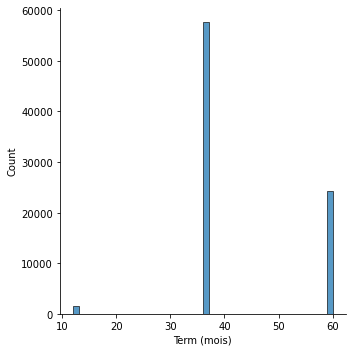

In [194]:
# on va utiliser la fonction displot() de seaborn 
sns.displot(df_prosper['Term'])
plt.xlabel('Term (mois)')

> La plupart des emprunteurs efféctuent un prêt de 36 mois. La variable **Term** est également une valeur numerique discréte.

In [183]:
df_prosper['LenderYield'].value_counts()

0.3077    3672
0.3099    1645
0.2599    1282
0.0999     905
0.3400     806
          ... 
0.3133       1
0.3359       1
0.2914       1
0.2803       1
0.2565       1
Name: LenderYield, Length: 1223, dtype: int64

<AxesSubplot:xlabel='LenderYield', ylabel='Count'>

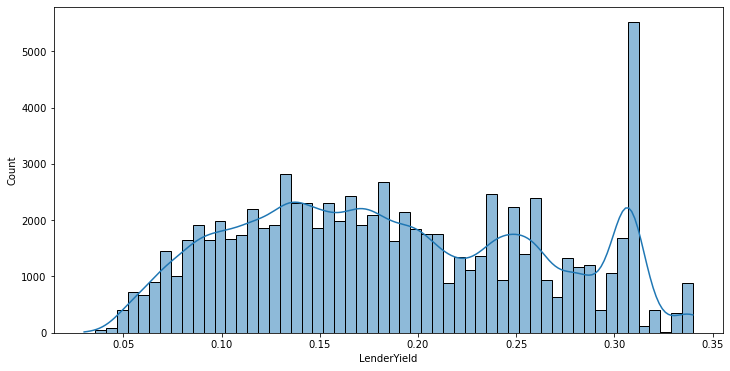

In [190]:
#fonction histplot de seaborn
plt.figure(figsize=[12,6])
sns.histplot(df_prosper['LenderYield'],kde = True)

> Le rendement du prêteur à connu un nombre important aux taux 0.31

# Exploration Bivarié

### Pour commencer, je veux examiner les corrélations par paires présentes entre les variables dans les données.


In [198]:
# separation variable numerique et variable catégorielle
numeric_var = ['ListingNumber','Term','BorrowerAPR','BorrowerRate','LenderYield',
               'Investors','ProsperScore','LoanNumber','LoanOriginalAmount']
categoric_var = ['LoanStatus','BorrowerState','EmploymentStatus','ProsperRating (Alpha)','Occupation']

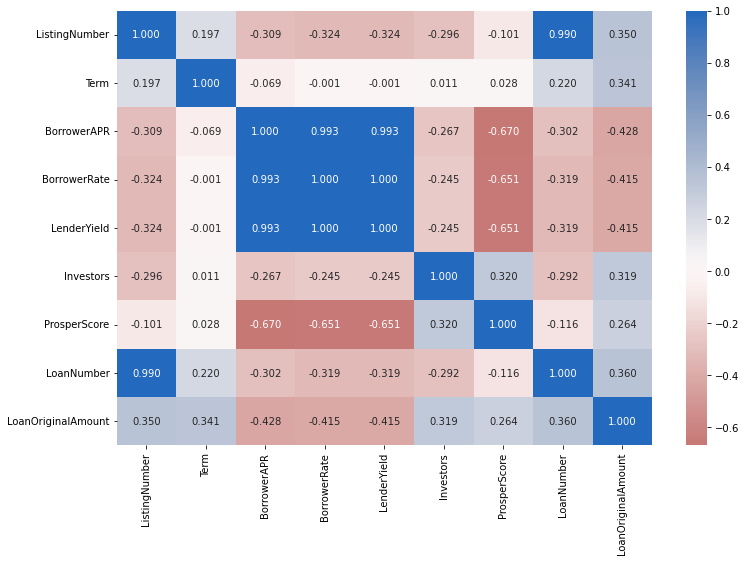

In [199]:
# Diagramme de corrélation des variables numérique
plt.figure(figsize=[12,8])
# on va utiliser la fonctions de heatmap() de seaborn
sns.heatmap(df_prosper[numeric_var].corr(),annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

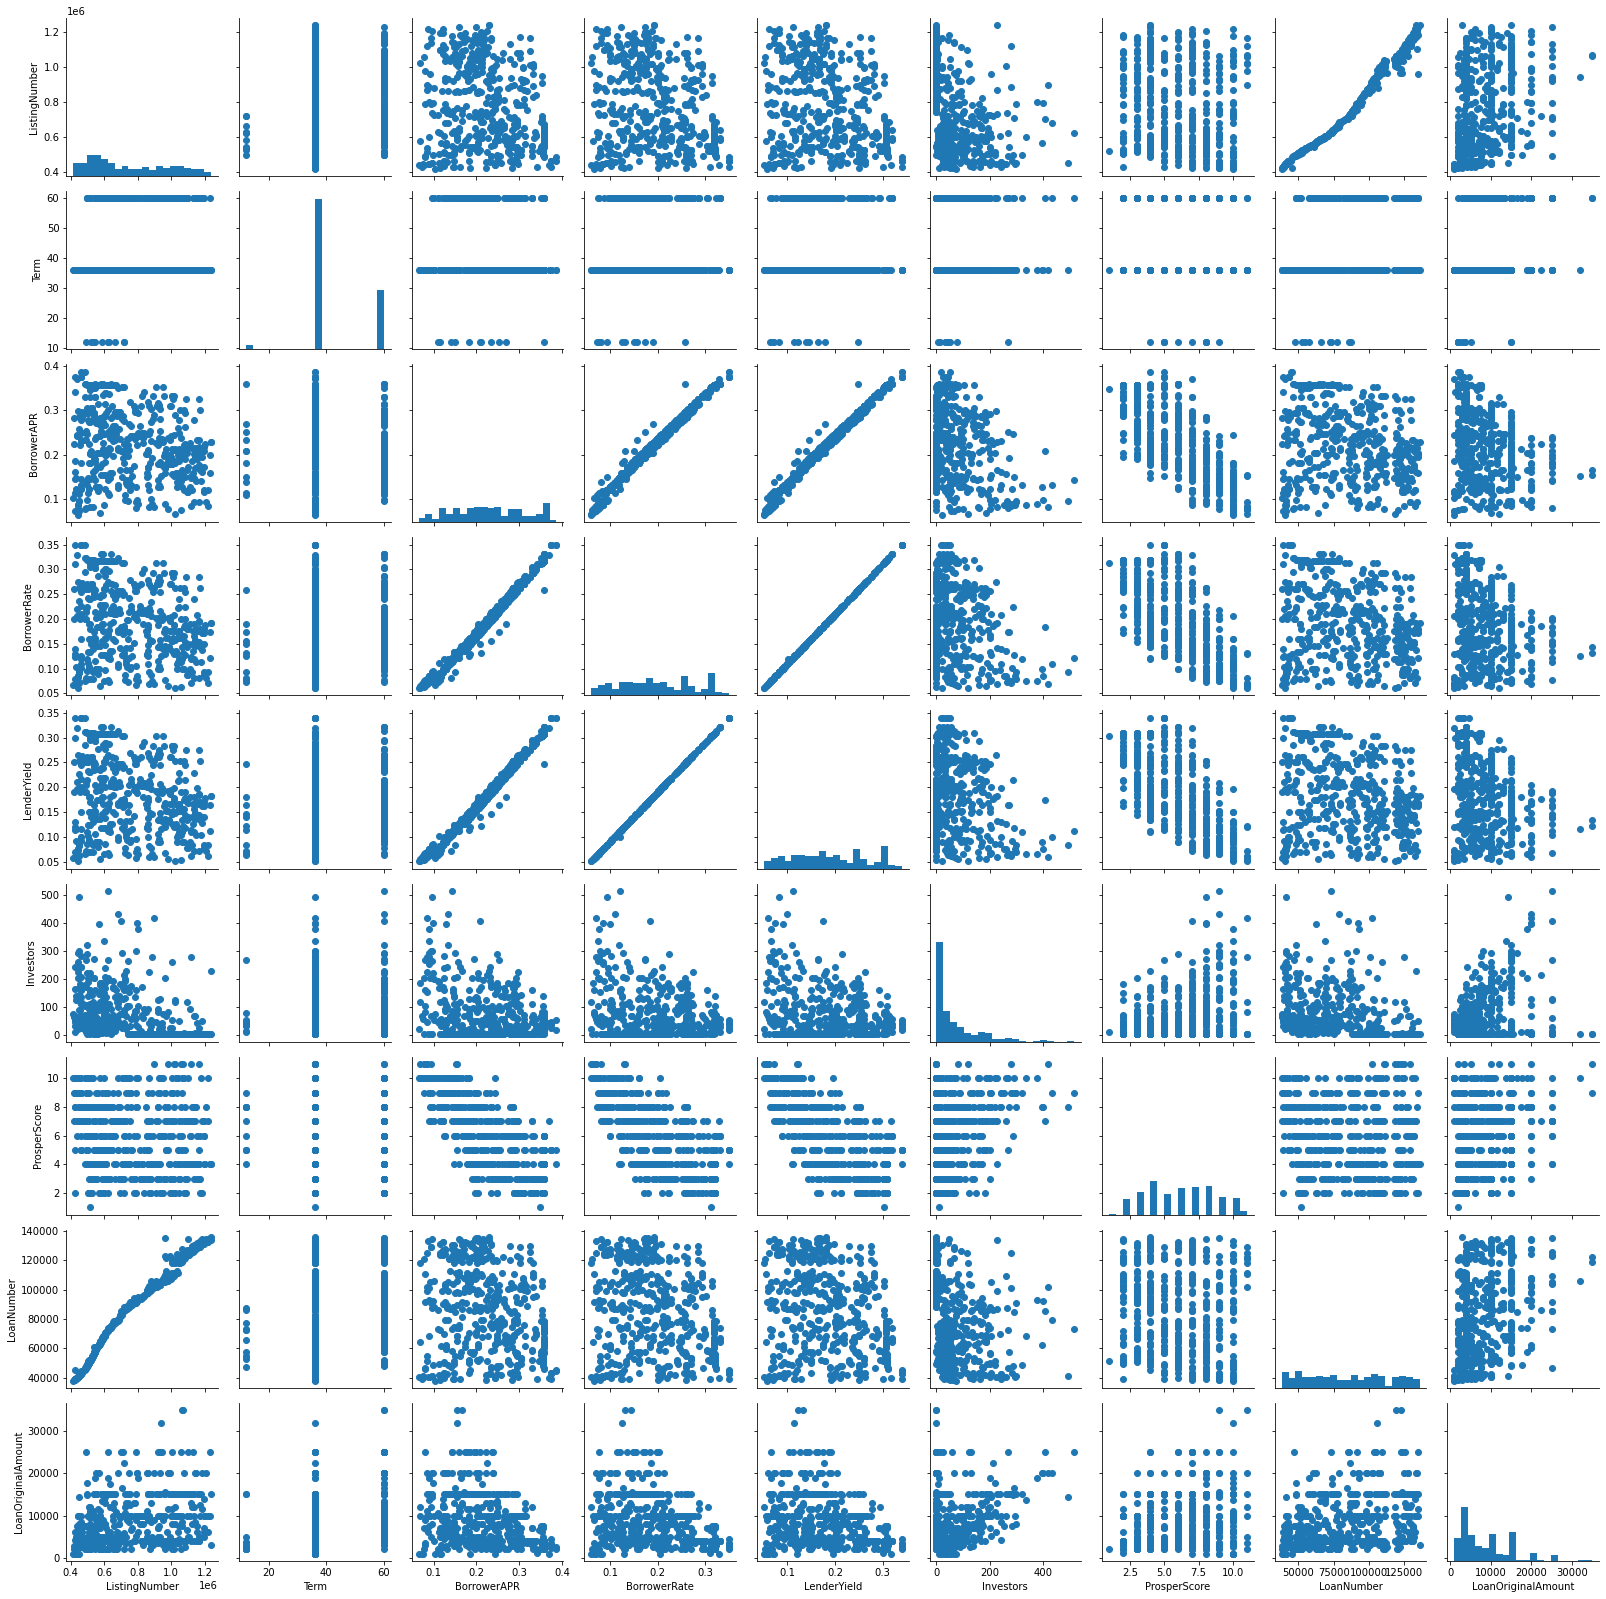

In [200]:
# Diagramme de matrice
samples = np.random.choice(df_prosper.shape[0],500,replace = False)
prosper_samples = df_prosper.loc[samples,:]

g = sns.PairGrid(data = prosper_samples, vars = numeric_var )
g= g.map_diag(plt.hist,bins = 20);
g.map_offdiag(plt.scatter)


Comme prévu, les variables **BarrowerAPR, BarrowerRate, LenderYield** sont toutes fortements correlés entre elles de même que les variables **LoanNumber et ListingNumber**. Ce point mérite d'être approfondi dans cette section. Mais aussi la variable **ProsperScore** à une corrélation assez forte mais négative avec les trois variables **BarrowerAPR, BarrowerRate et LenderYield**.
Il est possible que les variables BarrowerAPR, BarrowerRate et LenderYield evoluent proportionnellement ensemble. Les variables **Term, Investors et LoanOriginalAmount** n'ont pas de forte corrélation entre les autres variables numériques dans l'ensembles des données.Donc je n'effectuerai pas d'autre analyse avec ces variables car elles ne semblent  pas présenter un grand interêt. 

### Examinons maintenant la corrélation entre la valeur numérique unique associée au prêt (LoanNumber) et le numéro qui identifie de manière unique le listing pour le public tel qu'il est affiché sur le site web (ListingNumber) et les variables catégorielles.

<Figure size 720x720 with 0 Axes>

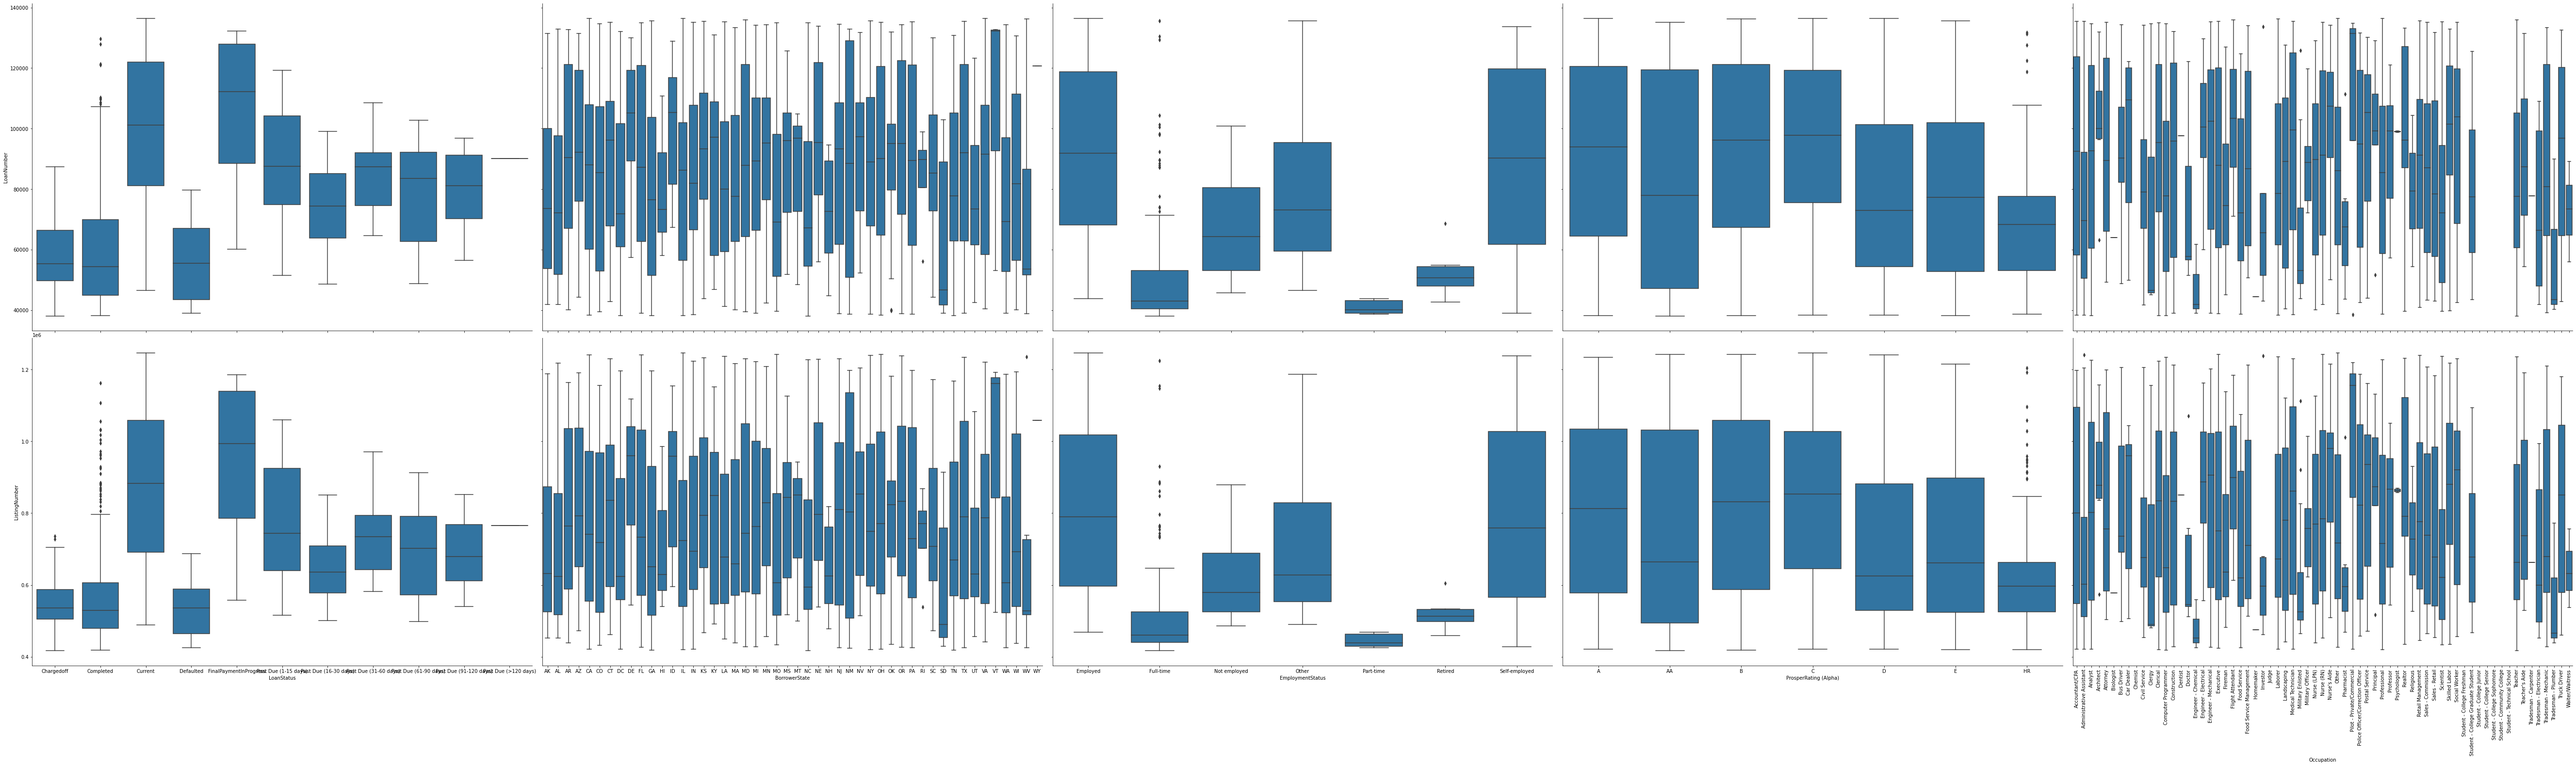

In [212]:
#Tracer la matrice des caractéristiques numériques par rapport aux caractéristiques catégorielles.

#On peut utiliser un plus grand échantillon car il y a moins de graphiques et ils sont plus simples par nature.
samples = np.random.choice(df_prosper.shape[0], 2000, replace = False)
prosper_samples = df_prosper.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = prosper_samples, y_vars = ['LoanNumber', 'ListingNumber'], x_vars = categoric_var,
                height = 10, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.show();


Il est trés intéressent de constater qu'il existe une forte relations entres les variables vatégorielle et les deux variables numériques. Cette Visualisation montre que les deux variabes nuémrique sont proportionnelle et presque les mêmes. 

### Examinons les relations entres les variables catégorielle.

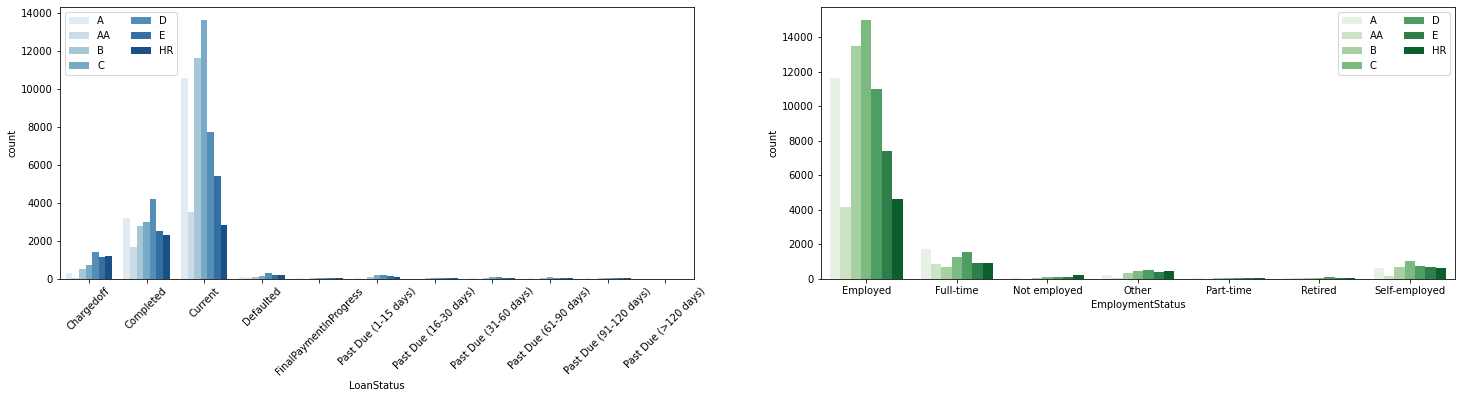

In [215]:
# creation de la figure
plt.figure(figsize = [25, 5])

# subplot 1: 
ax = plt.subplot(1, 2, 1)
sns.countplot(data = df_prosper, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xticks(rotation = 45)
ax.legend(ncol = 2)

# subplot 2:
ax = plt.subplot(1, 2, 2)
sns.countplot(data = df_prosper, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(ncol = 2)

plt.show()

> Le statut de l'emprunteur et le classement de la listes de prosper ont une interaction importante au status de type Employé (**Employed**). Les prêts en cours (**Current de la variable LoanStatus qui represente le status des prêts**) a une forte interaction avec la varibale ProsperRating (Alpha) aux valeurs **C et B** .

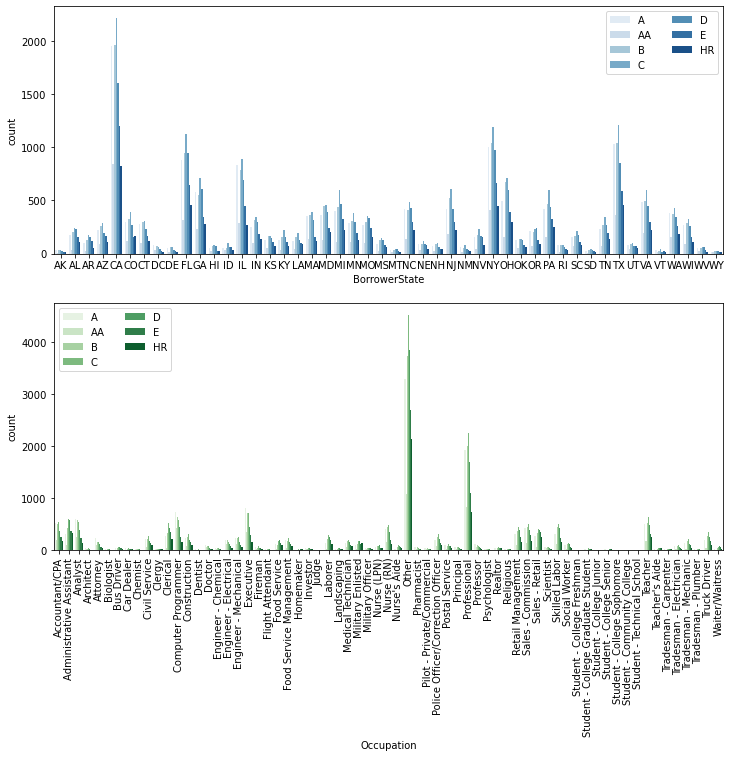

In [231]:
# creation de la figure
fig, ax = plt.subplots(nrows=2, figsize = [12,10])


sns.countplot(data = df_prosper, x = 'BorrowerState', hue = 'ProsperRating (Alpha)', palette = 'Blues',ax = ax[0])

ax[0].legend(ncol = 2)

# subplot 2:
#ax = plt.subplot(1, 2, 2)
sns.countplot(data = df_prosper, x = 'Occupation', hue = 'ProsperRating (Alpha)', palette = 'Greens',ax = ax[1])
ax[1].legend(ncol = 2)
plt.xticks(rotation = 90)
plt.show()


> Il ne semble pas avoir beaucoup d'interaction entre la profession des emprunteur et le status des prêts.
La plupart des emprunteurs qui habitent à l'adresse **CA** ont eu un classement de type **C**. Le grahique suivant nous donne plus de details sur ces informations.

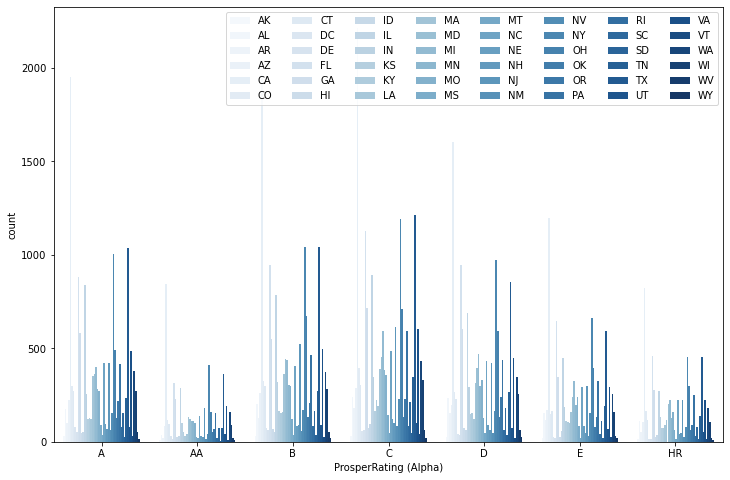

In [240]:
plt.figure(figsize=[12,8])
sns.countplot(data = df_prosper, x = 'ProsperRating (Alpha)', hue = 'BorrowerState', palette = 'Blues')
plt.legend(ncol = 8)

Vous vouyez le classement de prosper attribué aux emprunteurs au moments de la création de la liste à une forte interactions avec l'adresse des emprunteurs.

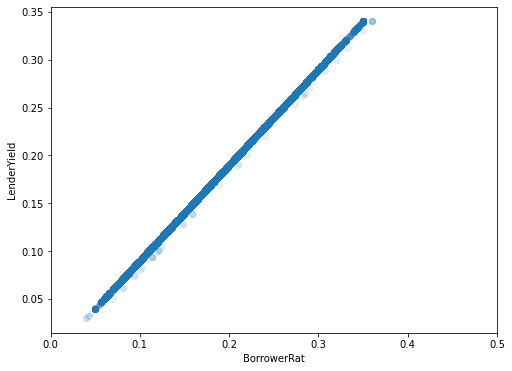

In [257]:
# Graphique de nuage de point entre les variables BorrowerRate et LenderYield
# graphique en nuage de points du prix par rapport au carat, avec 
#transformation logarithmique sur l'axe des prix

plt.figure(figsize = [8, 6])
plt.scatter(data = df_prosper, x = 'BorrowerRate', y = 'LenderYield', alpha =0.1)
plt.xlim([0, 0.5])
plt.xlabel('BorrowerRat')
plt.ylabel('LenderYield')
plt.show()

> Ce graphique du taux d'intérêt de l'emprunteur pour ce prêt en fonction rendement  du prêteur sur le prêt génére une relation qui semble beaucoup plus linéaire.

**Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les variables qui vous intéressent varient-elles avec les autres variables de l'ensemble de données ?**

Le rendement (**LenderYield**) présente une corrélation étonnamment élevée avec la taux d'interêt des emprunteurs (**BorrowerRate**)des données de prêts de Prosper.Une relation linéaire a été observée entre ces deux variables.

Une relation intéressante a également été observée entre ces trois (**LenderYield, BorrowerRate, et BorrowerAPR**) et les variables catégorielles.

**Avez-vous observé des relations intéressantes entre les autres caractéristiques (autres que la ou les principales variables d'intérêt) ?**

Les relations attendues ont été trouvées dans l'association entre les variables comme: **ListingNumber,Term,Investors, ProsperScore, LoanNumber, LoanOriginalAmount** des données de prêts de Prosper aux autres dimensions linéaires. Une petite corrélation négative a été observée entre le nombre d'investisseur qui ont financé le prêt (**Investors**) et la valeur numérique unique associé à un prêt (**LoanNumber**) de même que Le score de risque personnalisés à partir des données historiques de Prosper (**ProsperScore**) mais aucune de ces variables ne présente une forte corrélation avec le rendement ou le taux d'interêt a part le score de risque dont la corrélation est négative, elles ne seront donc pas étudiées plus avant. Une petite interaction a également été observée dans les caractéristiques catégorielles du prêt. 

# Exploration multivariée

**La principale chose que je souhaite explorer dans cette partie de l'analyse est le taux d'interêt de l'emprunteur pour les prêts et certaines variables categorielles comme le status du prêt, la profession de l'emprunteur, le status de l'emprunteur** ...


In [278]:
def cuberoot_trans(x, inverse = False):
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [279]:
df_prosper['rendement'] = df_prosper['LenderYield'].apply(cuberoot_trans)

In [284]:
# calculer le logarithme du montant pour faciliter les tracés multivariés
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_prosper['montant'] = df_prosper['LoanOriginalAmount'].apply(log_trans)
carat_ticks = [0.09, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]

In [285]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(.5)+.05, .05)
    bins_y = np.arange(2.2, 4.1+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

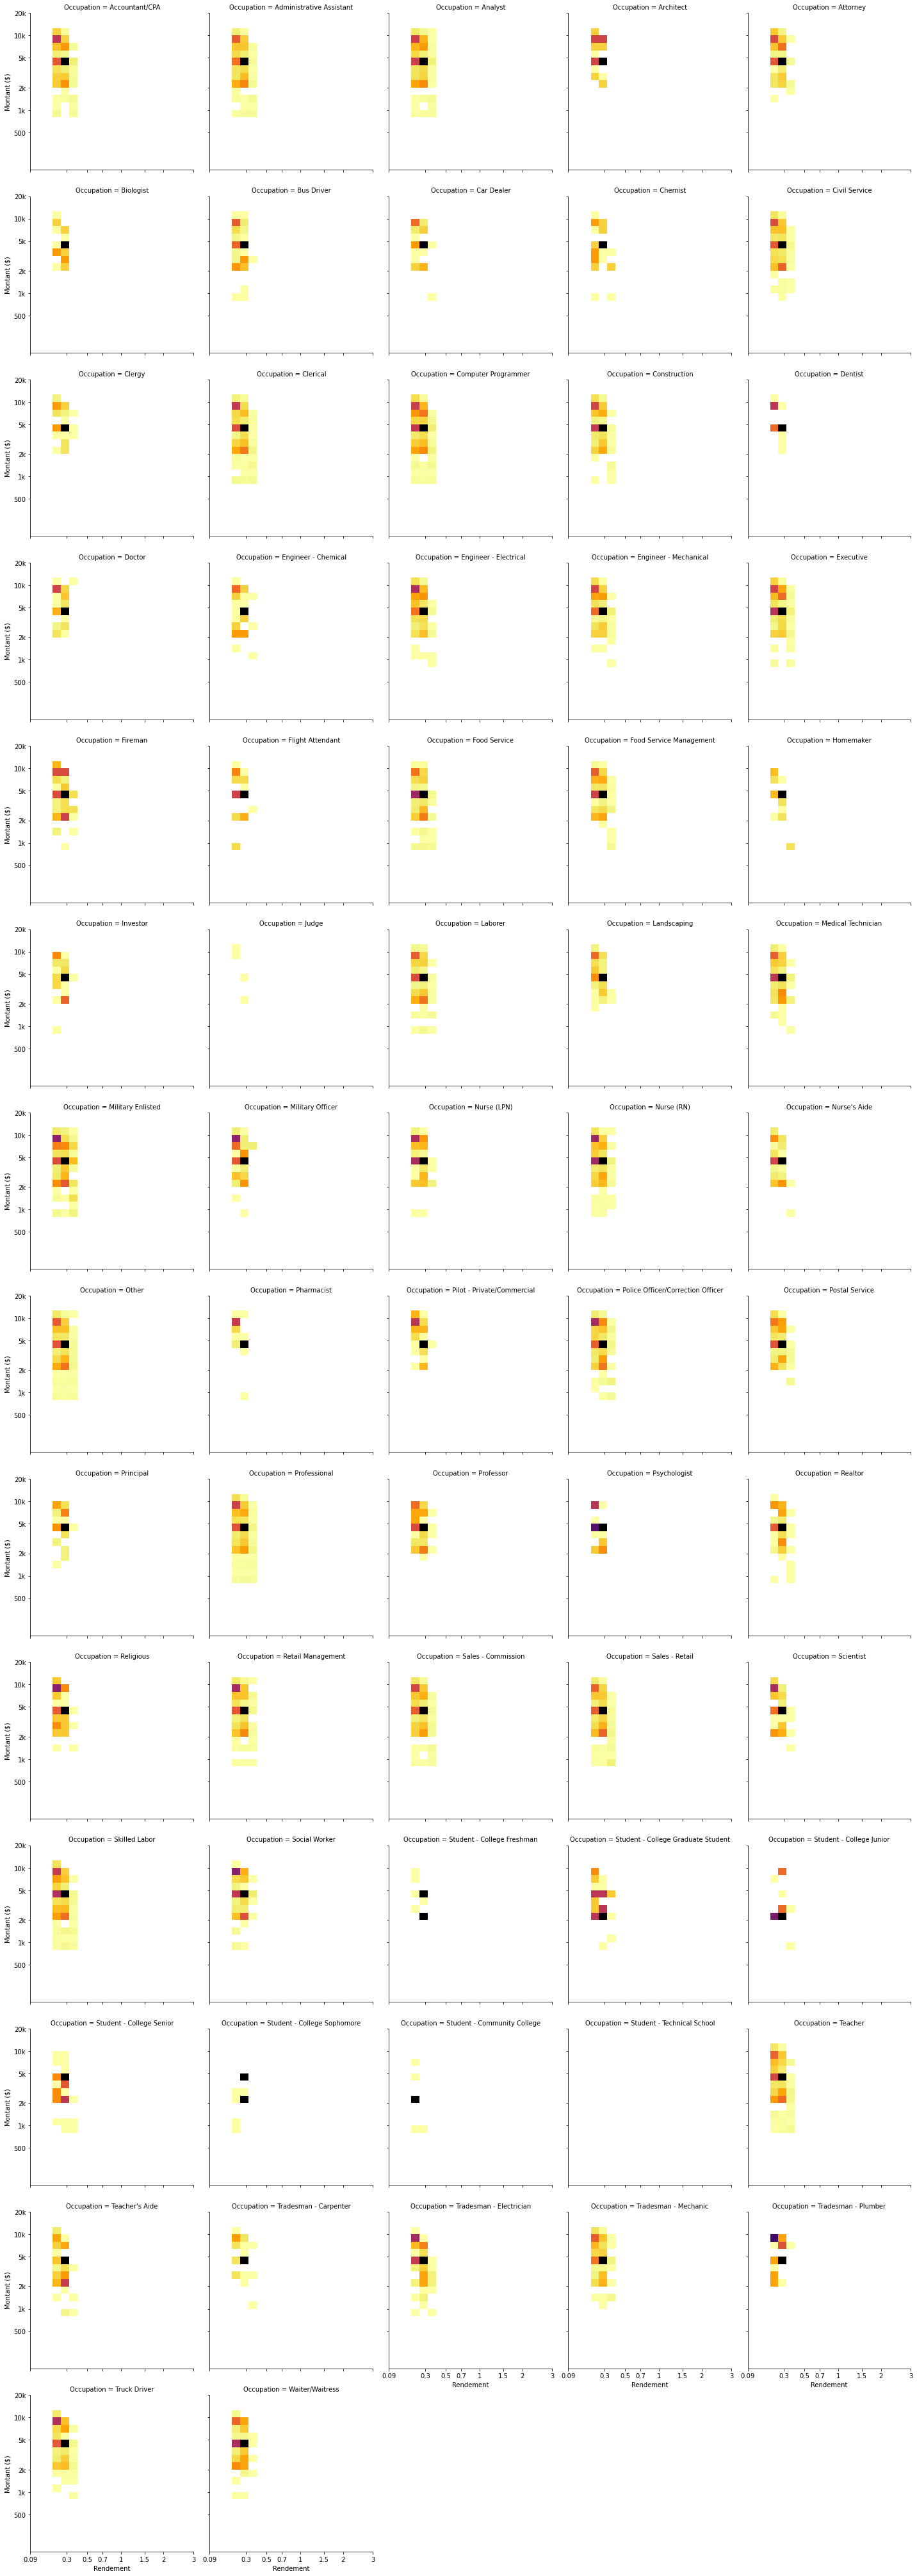

In [286]:
g = sns.FacetGrid(data = df_prosper, col = 'Occupation', col_wrap = 5, height = 4, 
                  xlim = [cuberoot_trans(.018), cuberoot_trans(0.35)] )
g.map(hist2dgrid, 'rendement', 'montant', color = 'inferno_r')
g.set_xlabels('Rendement')
g.set_ylabels('Montant ($)')

plt.show() 

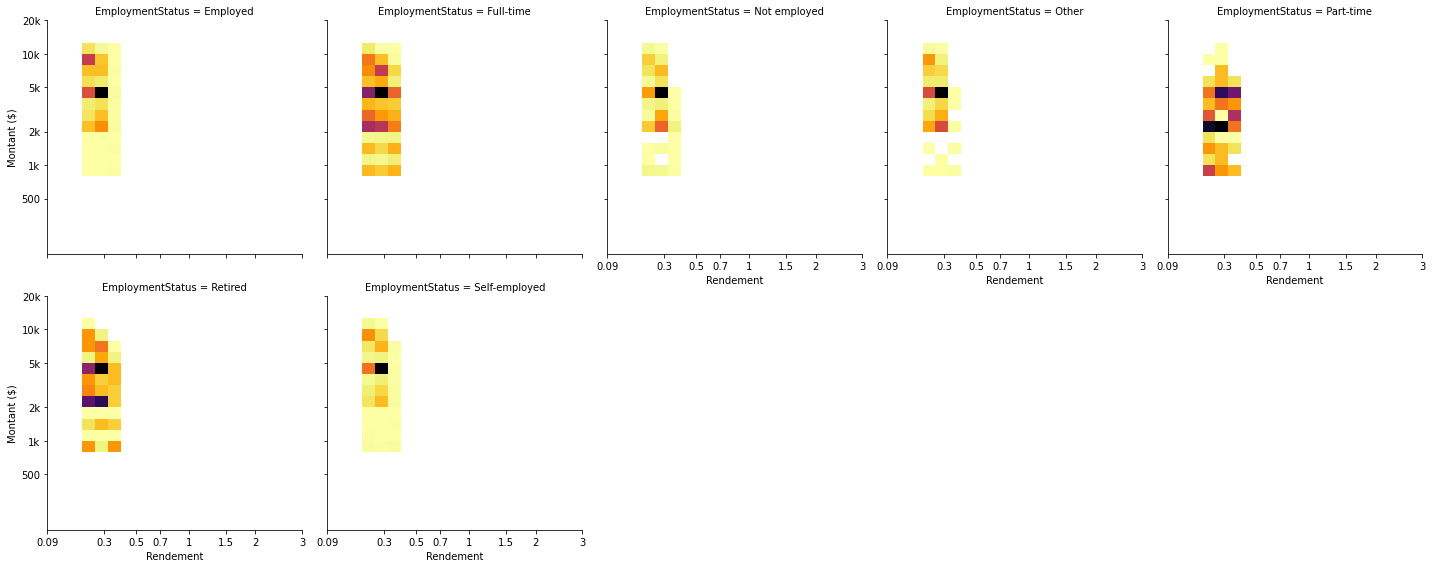

In [287]:
g = sns.FacetGrid(data = df_prosper, col = 'EmploymentStatus', col_wrap = 5, height = 4, 
                  xlim = [cuberoot_trans(.018), cuberoot_trans(0.35)] )
g.map(hist2dgrid, 'rendement', 'montant', color = 'inferno_r')
g.set_xlabels('Rendement')
g.set_ylabels('Montant ($)')

plt.show() 

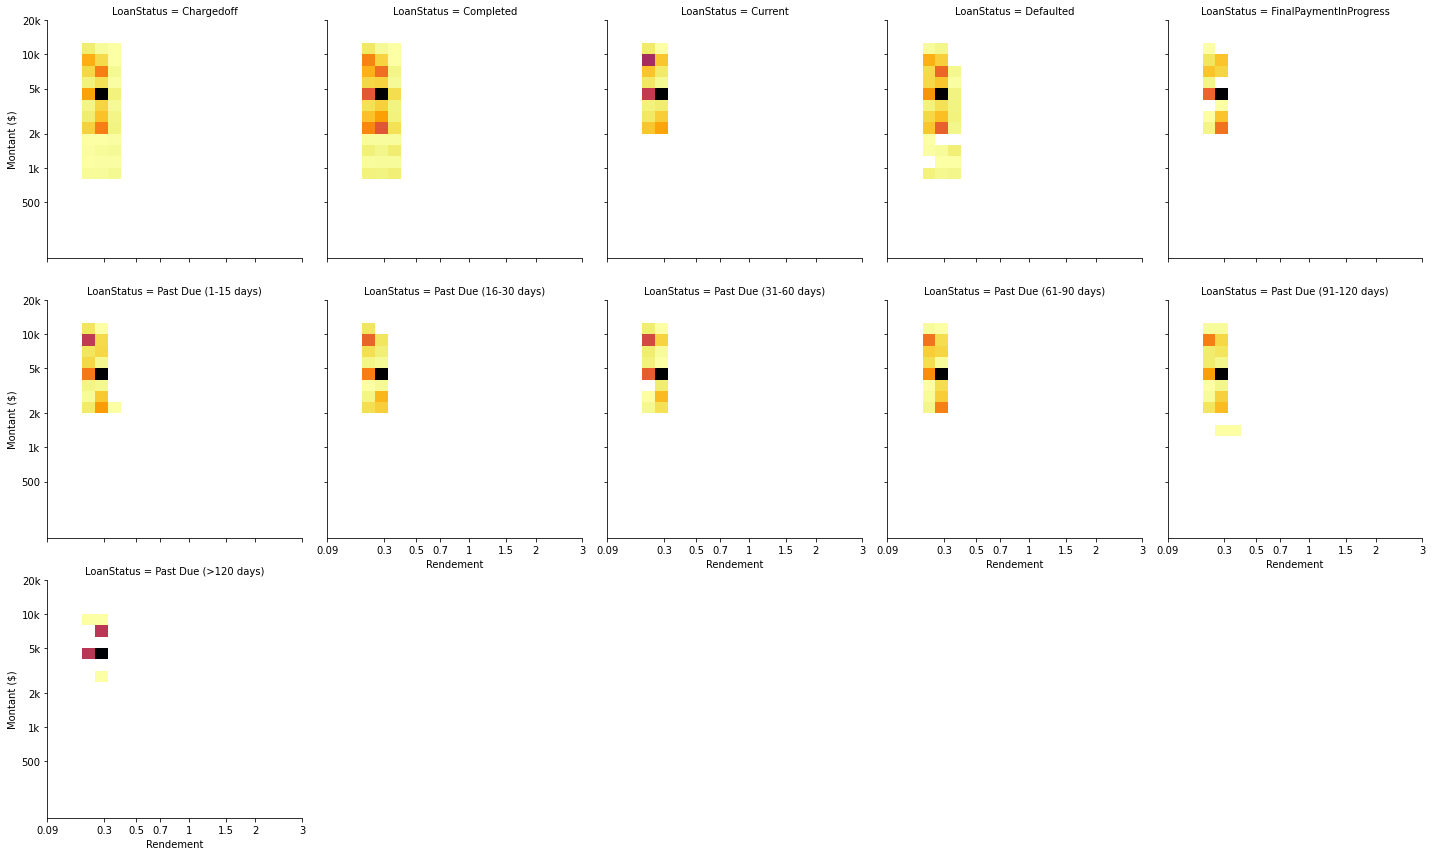

In [288]:
g = sns.FacetGrid(data = df_prosper, col = 'LoanStatus', col_wrap = 5, height = 4, 
                  xlim = [cuberoot_trans(.018), cuberoot_trans(0.35)] )
g.map(hist2dgrid, 'rendement', 'montant', color = 'inferno_r')
g.set_xlabels('Rendement')
g.set_ylabels('Montant ($)')

plt.show() 

Dans chacune des heatmaps , vous pouvez voir la relation entre le rendement (LenderYield) et le montant le montatnt initiale de chaque prêt (LoanOriginalAmount) à des niveaux d'efficacité variables.
J'ai essayé de regarder une diagramme à facettes sur deux valeus de profession, mais il semble qu'il y ait trop de facettes à examiner. Peut-être qu'un meilleur résumé peut être obtenu en examinant uniquement les Prêt avec un rendement specifique.


In [295]:
prosper_rend = (df_prosper['LenderYield'] >= 0.30) & (df_prosper['LenderYield'] <= 0.34)
prosper_rend_1c = df_prosper.loc[prosper_rend,:]

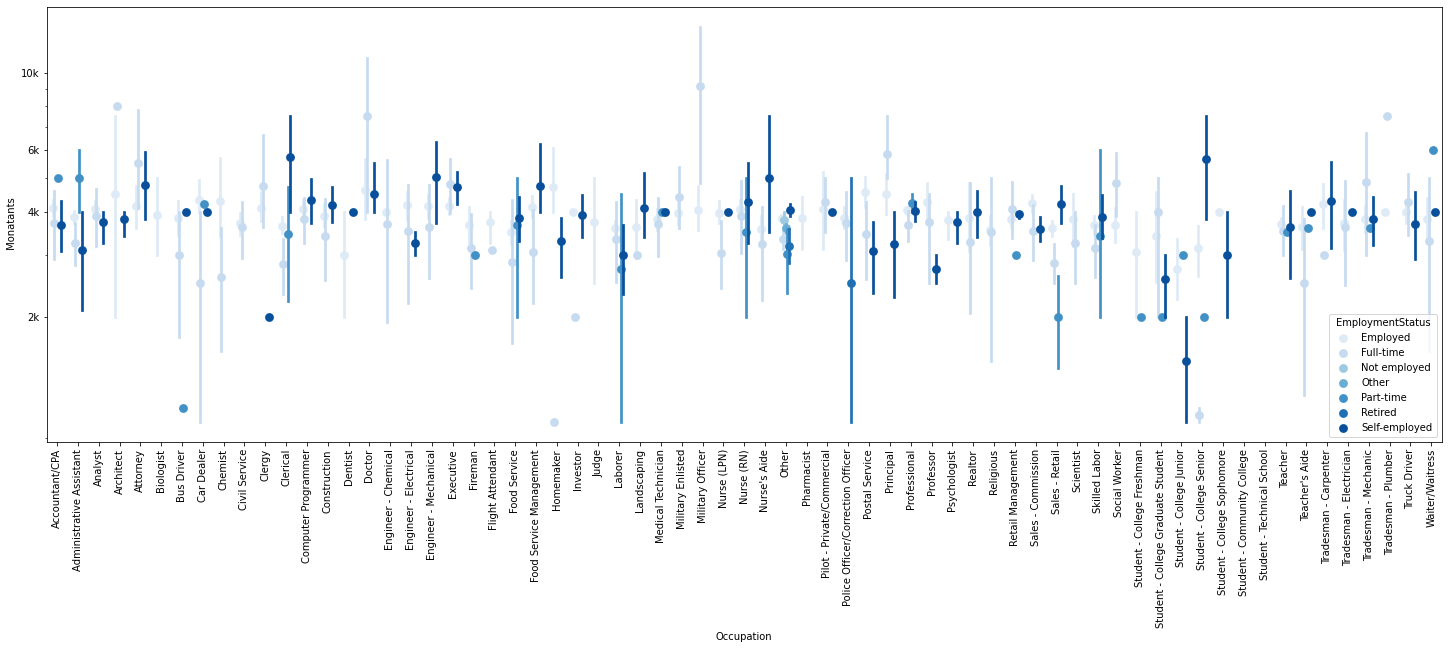

In [300]:
fig = plt.figure(figsize = [25,8])
ax = sns.pointplot(data = prosper_rend_1c, x = 'Occupation', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.ylabel(' Montants')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation= 90)
plt.show();

Ce graphique à point esquissés montre l'influence manifeste de la profession des emprunteurs (**Occupation**) et du statuts des emprunteurs dans leurs emploie (**EmploymentStatus**) sur les prêts. Il intéressent de noter que les prêts dont leurs emprunteurs ont un status employed et self_employed sont plus réccurent. Mais les emprunteurs de status employed fond généralement de prêt avec un montant élevés.

**Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y a-t-il des variables qui se renforcent mutuellement pour ce qui est de l'examen de la ou des variable(s) qui vous intéresse(nt) ?**

J'ai étendu mon étude du montant des prêts  par rapport à la profession des emprunteurs  dans cette section en examinant l'impact des trois caractéristiques de qualité catégorielles. L'exploration multivariée a montré qu'il existe effectivement un effet positif de la profession des emprunteurs sur les prêts. Mais le status de l'emploi des emprunteur à aussi un effets sur le montants emprunter. En contrôlant le taux d'interêt des emprunteurs pour les prêts l'effet des autres variables comme le rendement et le taux d'interêt annuel effectif global apparaît plus clairement. 

 **Y a-t-il eu des interactions intéressantes ou surprenantes entre les variables ?**

En regardant les graphiques ponctuels, il ne semble pas y avoir d'effet d'interaction systématique entre les variables catégorielles. Cependant, les varaiables ne sont pas non plus totalement indépendantes.